In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
titanic_mean=titanic.copy()
means=titanic_mean.Survived.groupby(titanic_mean.Sex).mean()
display(means)
titanic_mean["Sex_encoded"]=titanic_mean.Sex.map(means)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [4]:
titanic_mean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [5]:
titanic_OneHotEnc=titanic.copy()
titanic_OneHotEnc.Embarked=titanic_OneHotEnc.Embarked.fillna(titanic_OneHotEnc.Embarked.mode()[0])
pd.get_dummies(titanic_OneHotEnc,columns=["Embarked"]).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [6]:
titanic_lbl = titanic.copy()
titanic_lbl.Cabin=titanic_lbl.Cabin.fillna(titanic_lbl.Cabin.mode()[0])
lbl_enc=LabelEncoder()

titanic_lbl["Cabin_encoded"]=lbl_enc.fit_transform(titanic_lbl.Cabin)
titanic_lbl.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,47
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,47


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

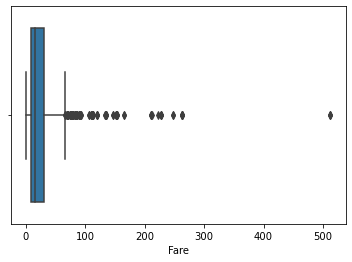

In [7]:
sns.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [8]:
#python kodu buraya
Z_Score=(titanic["Fare"]-titanic["Fare"].mean())/titanic["Fare"].std()
print("Tespit edilen sınır değer sayıları : ",(Z_Score>3).sum(),(Z_Score<-3).sum())
max_value=titanic.loc[Z_Score<=3,"Fare"].max()
min_value=titanic.loc[Z_Score>=-3,"Fare"].min()
print("Tespit edilen sınır değerleri : ",max_value,min_value)


Tespit edilen sınır değer sayıları :  20 0
Tespit edilen sınır değerleri :  164.8667 0.0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [9]:
titanic_z_rep=titanic.copy()
titanic_z_rep.loc[Z_Score>3,"Fare"]=max_value
titanic_z_rep.loc[Z_Score<3,"Fare"]=min_value
print("Z Score ile doldurulan datanın max değeri : ",titanic_z_rep.Fare.max())
print("Datanın max değeri : ",titanic.Fare.max())     


Z Score ile doldurulan datanın max değeri :  164.8667
Datanın max değeri :  512.3292


Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [10]:
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)
iqr=q3-q1
print("IQR değeri : ",iqr)

IQR değeri :  23.0896


In [11]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print("Sınır değerler : ",lower_limit, upper_limit)
print("Outlier sayıları : ",(titanic["Fare"]>upper_limit).sum(),(titanic["Fare"]<lower_limit).sum())

Sınır değerler :  -26.724 65.6344
Outlier sayıları :  116 0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [12]:
titanic_iqr_rep=titanic.copy()
titanic_iqr_rep.loc[titanic["Fare"]>upper_limit, "Fare"]=upper_limit
titanic_iqr_rep.loc[titanic["Fare"]<lower_limit,"Fare"]=lower_limit
print("IQR ile outlier'ı doldurulan data'nın max değeri: ",titanic_iqr_rep.Fare.max())
print("Datanın max değer",titanic.Fare.max())


IQR ile outlier'ı doldurulan data'nın max değeri:  65.6344
Datanın max değer 512.3292


Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [13]:
low_limit=titanic["Fare"].quantile(q=0.01)
up_limit=titanic["Fare"].quantile(q=0.99)

print("Sınır değerler : ",low_limit,up_limit)
print("Outlier sayıları : ",(titanic["Fare"]<low_limit).sum(),(titanic["Fare"]>up_limit).sum())


Sınır değerler :  0.0 249.00622000000033
Outlier sayıları :  0 9


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [14]:
titanic_hedge_rep=titanic.copy()
titanic_hedge_rep.loc[titanic["Fare"]>upper_limit,"Fare"]=up_limit
titanic_hedge_rep.loc[titanic["Fare"]<lower_limit,"Fare"]=low_limit

print("Hard-Edge ile outlier'ı doldurulan data'nın max değeri: ",titanic_hedge_rep.Fare.max())
print("Datanın max değer: ",titanic.Fare.max())



Hard-Edge ile outlier'ı doldurulan data'nın max değeri:  249.00622000000033
Datanın max değer:  512.3292


Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

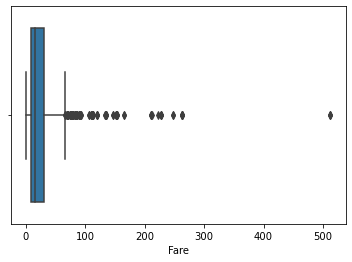

In [15]:
sns.boxplot(titanic.Fare)


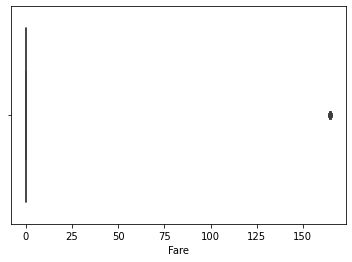

In [16]:
sns.boxplot(titanic_z_rep.Fare)


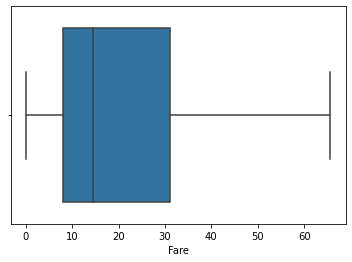

In [17]:
sns.boxplot(titanic_iqr_rep.Fare)


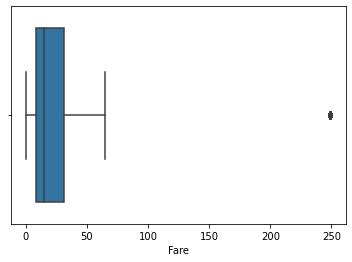

In [18]:
sns.boxplot(titanic_hedge_rep.Fare)


In [19]:
print("Yukarıdaki grafikler incelendiğinde en iyi outlier temzileme işlemi iqr metodu kullanılarak gerçekleştirilmiştir.")

Yukarıdaki grafikler incelendiğinde en iyi outlier temzileme işlemi iqr metodu kullanılarak gerçekleştirilmiştir.
